# Flight Delay Prediction 

In [8]:
from sys import stdin
import numpy as np # linear algebra
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from numpy import exp,array,random,dot
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Load the data
data = pd.read_csv("FlightDelay1.csv")

print("The number of rows in the data set is {}.".format(len(data)))
print("The number of features is {}.".format(len(data.columns)))

data.head()

The number of rows in the data set is 23988.
The number of features is 12.


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_ID,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,SCHED_DEP_TIME,SCHED_ARR_TIME,DELAY
0,2017,1,1,7,6,19805,1766,11298,12889,1055,1154,0.0
1,2017,1,1,8,7,19805,1766,11298,12889,1055,1154,0.0
2,2017,1,1,1,7,19805,1766,13930,11298,710,948,0.0
3,2017,1,1,2,1,19805,1766,13930,11298,710,948,0.0
4,2017,1,1,3,2,19805,1766,13930,11298,710,948,0.0


Data Preprocessing:

In [9]:
# Finding Null Values
data.isnull().sum()

YEAR                   0
QUARTER                0
MONTH                  0
DAY_OF_MONTH           0
DAY_OF_WEEK            0
AIRLINE_ID             0
FL_NUM                 0
ORIGIN_AIRPORT_ID      0
DEST_AIRPORT_ID        0
SCHED_DEP_TIME         0
SCHED_ARR_TIME         0
DELAY                462
dtype: int64

In [10]:
new_data = data.dropna(axis=0)#Delete the rows containing missing data
new_data.isnull().sum() #Check to make sure there are no more NaNs

YEAR                 0
QUARTER              0
MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
AIRLINE_ID           0
FL_NUM               0
ORIGIN_AIRPORT_ID    0
DEST_AIRPORT_ID      0
SCHED_DEP_TIME       0
SCHED_ARR_TIME       0
DELAY                0
dtype: int64

In [11]:
print("The number of rows in the new data set is {}.".format(len(new_data)))

The number of rows in the new data set is 23526.


In [12]:
#subset the flight that delayed
delay_flight=new_data[new_data.DELAY==1]
#print(delay_flight)

In [13]:
#exploring most five origin airport delay 
Top5origin_Airport_delay=delay_flight.groupby('ORIGIN_AIRPORT_ID').DELAY.sum().nlargest(5)
print(Top5origin_Airport_delay)

ORIGIN_AIRPORT_ID
12892    395.0
14771    328.0
11298    327.0
11292    293.0
10397    278.0
Name: DELAY, dtype: float64


In [22]:
#exploring most five destenation airport delay 
Top5dest_Airport_delay=delay_flight.groupby('DEST_AIRPORT_ID').DELAY.sum().nlargest(5)
print(Top5dest_Airport_delay)

DEST_AIRPORT_ID
14771    339.0
12892    263.0
10397    240.0
13930    239.0
11298    195.0
Name: DELAY, dtype: float64


In [17]:
#cleaning data keeping the Top five origin airport delay 
Top5Origin_airport=new_data.loc[new_data['ORIGIN_AIRPORT_ID'].isin(['10397', '12892', '13930','11292','14771'])] 
Top5Origin_airport.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_ID,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,SCHED_DEP_TIME,SCHED_ARR_TIME,DELAY
2,2017,1,1,1,7,19805,1766,13930,11298,710,948,0.0
3,2017,1,1,2,1,19805,1766,13930,11298,710,948,0.0
4,2017,1,1,3,2,19805,1766,13930,11298,710,948,0.0
5,2017,1,1,4,3,19805,1766,13930,11298,710,948,0.0
6,2017,1,1,5,4,19805,1766,13930,11298,710,948,0.0


In [23]:
#cleaning data keeping the Top five dest airport delay 
clean_data=Top5Origin_airport.loc[new_data['DEST_AIRPORT_ID'].isin(['10397', '12892', '13930','11292','14771'])] 
clean_data.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_ID,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,SCHED_DEP_TIME,SCHED_ARR_TIME,DELAY
1640,2017,1,1,22,7,19393,3534,11292,10397,2005,50,0.0
1641,2017,1,1,22,7,19393,3750,11292,10397,1700,2150,0.0
1642,2017,1,1,22,7,19393,4493,11292,10397,1235,1720,1.0
1697,2017,1,1,22,7,19393,2894,11292,12892,1555,1720,1.0
1698,2017,1,1,22,7,19393,2912,11292,12892,825,955,0.0


In [24]:
dummy_data = pd.get_dummies(clean_data, columns=['AIRLINE_ID', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID'], drop_first=True)
dummy_data.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,SCHED_DEP_TIME,SCHED_ARR_TIME,DELAY,AIRLINE_ID_19790,...,AIRLINE_ID_20304,AIRLINE_ID_21171,ORIGIN_AIRPORT_ID_11292,ORIGIN_AIRPORT_ID_12892,ORIGIN_AIRPORT_ID_13930,ORIGIN_AIRPORT_ID_14771,DEST_AIRPORT_ID_11292,DEST_AIRPORT_ID_12892,DEST_AIRPORT_ID_13930,DEST_AIRPORT_ID_14771
1640,2017,1,1,22,7,3534,2005,50,0.0,0,...,0,0,1,0,0,0,0,0,0,0
1641,2017,1,1,22,7,3750,1700,2150,0.0,0,...,0,0,1,0,0,0,0,0,0,0
1642,2017,1,1,22,7,4493,1235,1720,1.0,0,...,0,0,1,0,0,0,0,0,0,0
1697,2017,1,1,22,7,2894,1555,1720,1.0,0,...,0,0,1,0,0,0,0,1,0,0
1698,2017,1,1,22,7,2912,825,955,0.0,0,...,0,0,1,0,0,0,0,1,0,0


In [139]:
# Setting the train set,test set, and validation set
x= dummy_data.iloc[:,0:20]
y= dummy_data['DELAY']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2, random_state = 1)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=.25, random_state = 1)

In [27]:
x_train.shape

(715, 20)

In [28]:
x_test.shape

(239, 20)

In [29]:
x_val.shape

(239, 20)

# Artificial Neural Network:

Building the Model:

In [30]:
class NeuralNetwork():
    def __init__(self):
        # seed the random number generator, so it generates the same 
        random.seed(1)
        
        # We Model a single neuron, with 11 input and one output connection
        self.synaptic_weights = 2 * random.random((20,1)) -1
        
    # The sigmod function, which take the wieghted sum and normalized it between 0 and 1    
    def __sigmoid(self,x):
        return 1/(1 + exp(-x))
    
    # The dervative of the sigmoid function, it indicates how confident we are about the wieght
    def __sigmoid_derivative(self,x):
        return x*(1-x)
    
    # we train the neural network through a process of trail and error.
    # Adjasting the synaptic weights each time.
    def train(self,training_set_inputs, training_set_outputs,number_of_training_iterations):
        for iteration in range(number_of_training_iterations):
            #Pass the training set through our neural network (a single neuran).
            output = self.think(training_set_inputs)
     
            #Calculate the error (The diffrence between the desired output and the predicted output )
            error = training_set_outputs - output
           
            # Multiply the error by the input and again by the gradient of the Sigmoid curve.
            # This means less Confident weight are adjusted more.
            # This means inputs,which are zero, do not cause changes to the weights.
            Adjustment = dot(training_set_inputs.T, error * self.__sigmoid_derivative(output))
            
            #Adjust the weights.
            self.synaptic_weights += Adjustment
            
    #The neural network thinks.
    def think(self,inputs):
        # Pass inputs through our neural network (our single neuron).
        return self.__sigmoid(dot(inputs, self.synaptic_weights))
            
            
if __name__ == "__main__":
    
    #I ntialise a single neuron neural network.
    neural_network = NeuralNetwork()
    
    print("Random starting synaptic weights: ")
    print(neural_network.synaptic_weights)

Random starting synaptic weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]
 [-0.39533485]
 [-0.70648822]
 [-0.81532281]
 [-0.62747958]
 [-0.30887855]
 [-0.20646505]
 [ 0.07763347]
 [-0.16161097]
 [ 0.370439  ]
 [-0.5910955 ]
 [ 0.75623487]
 [-0.94522481]
 [ 0.34093502]
 [-0.1653904 ]
 [ 0.11737966]
 [-0.71922612]
 [-0.60379702]]


Train the Model:

In [31]:
    training_set_inputs = x_train.values.reshape(-1,20)
    training_set_outputs = y_train.values.reshape(-1,1)

   
    # Train the neural network using a training set
    # Do it 10,000 time and make small adjusments each time.
    neural_network.train(training_set_inputs, training_set_outputs, 10000)
    
    print("New synaptic wieghts after training:")
    print(neural_network.synaptic_weights)

/Users/Manar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


New synaptic wieghts after training:
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]
 [-0.39533485]
 [-0.70648822]
 [-0.81532281]
 [-0.62747958]
 [-0.30887855]
 [-0.20646505]
 [ 0.07763347]
 [-0.16161097]
 [ 0.370439  ]
 [-0.5910955 ]
 [ 0.75623487]
 [-0.94522481]
 [ 0.34093502]
 [-0.1653904 ]
 [ 0.11737966]
 [-0.71922612]
 [-0.60379702]]


Validate the Model: 

In [32]:

# Test the neural network with a the validation data set
y_pred = neural_network.think(x_val)
    
print("The Confusing Matrix:")
print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val, y_pred, target_names=['class 0', 'class 1']))      
print('accuracy is',accuracy_score(y_pred,y_val))

The Confusing Matrix:
[[174   0]
 [ 65   0]]
             precision    recall  f1-score   support

    class 0       0.73      1.00      0.84       174
    class 1       0.00      0.00      0.00        65

avg / total       0.53      0.73      0.61       239

accuracy is 0.728033472803


/Users/Manar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/Users/Manar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Testing the Model:

In [33]:
# Test the neural network with a new set
y_pred = neural_network.think(x_test)
    
print("The Confusing Matrix:")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1']))      
print('accuracy is',accuracy_score(y_pred,y_test))

The Confusing Matrix:
[[185   0]
 [ 54   0]]
             precision    recall  f1-score   support

    class 0       0.77      1.00      0.87       185
    class 1       0.00      0.00      0.00        54

avg / total       0.60      0.77      0.68       239

accuracy is 0.774058577406


/Users/Manar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/Users/Manar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Logestic Regression:

In [34]:
from sklearn.linear_model import LogisticRegression as lg

from sklearn.metrics import classification_report
model=lg()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=metrics.accuracy_score(y_test,y_pred)

In [35]:
null_acc=max(y_test.mean(),1-y_test.mean())
print(null_acc)
print("True: ",y_test.values[0:25])
print("Pred: ",y_pred[0:25])

0.7740585774058577
True:  [ 0.  1.  0.  0.  0.  0.  1.  0.  1.  1.  1.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.]
Pred:  [ 0.  1.  0.  0.  0.  0.  1.  0.  1.  1.  1.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.]


In [36]:
confusion_matrix=metrics.confusion_matrix(y_pred,y_test)
confusion_matrix

array([[185,   0],
       [  0,  54]])

In [37]:
TP=confusion_matrix[1,1]
TN=confusion_matrix[0,0]
FP=confusion_matrix[0,1]
FN=confusion_matrix[1,0]
print("TP: ",TP ,"TN: ",TN ,"FP: ",FP ,"FN: ",FN)

TP:  54 TN:  185 FP:  0 FN:  0


In [38]:
Accuracy=(TP+TN)/float(TP+TN+FP+FN)
Miss_classification_rate=(FP+FN)/float(TP+TN+FP+FN)
TPR=TP/float(TP+FN)
TNR=TN/float(TN+FP)
FPR=FP/float(TN+FP)
FNR=FN/float(TP+FN)
Precision=TP/float(TP+FP)
print("TP: ",TP ,"TN: ",TN ,"FP: ",FP ,"FN: ",FN)
print("Accuracy: ", Accuracy*100,"vs",acc*100)
print("Miss-classification Rate: ", Miss_classification_rate*100)
print("TPR: ",TPR*100)
print("TNR: ",TNR*100)
print("FPR: ",FPR*100)
print("FNR: ",FNR*100)
print("Precision: ", Precision)

print(classification_report(y_test, y_pred, target_names=['class 0', 'Class 1'] ))

TP:  54 TN:  185 FP:  0 FN:  0
Accuracy:  100.0 vs 100.0
Miss-classification Rate:  0.0
TPR:  100.0
TNR:  100.0
FPR:  0.0
FNR:  0.0
Precision:  1.0
             precision    recall  f1-score   support

    class 0       1.00      1.00      1.00       185
    Class 1       1.00      1.00      1.00        54

avg / total       1.00      1.00      1.00       239



In [39]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [40]:
print(clean_data.shape)
print(list(clean_data.columns))

(1193, 12)
['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'AIRLINE_ID', 'FL_NUM', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'SCHED_DEP_TIME', 'SCHED_ARR_TIME', 'DELAY']


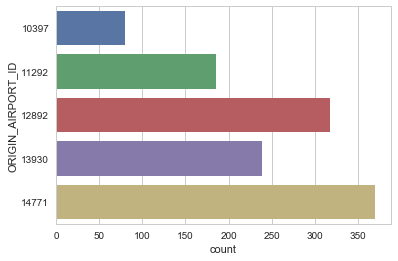

In [41]:
sns.countplot(y="ORIGIN_AIRPORT_ID", data=clean_data)
plt.show()

# K-Nearest Neighbour 

In [42]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(x_train, y_train)

# Test the classfier
y_pred = classifier.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred,target_names=['class 0', 'Class 1']))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

             precision    recall  f1-score   support

    class 0       0.78      0.96      0.86       185
    Class 1       0.38      0.09      0.15        54

avg / total       0.69      0.76      0.70       239

[[177   8]
 [ 49   5]]
accuracy is 0.761506276151


#RANDOM FOREST CLASSIFIER

In [218]:
# Setting the train set and test set
x = dummy_data[['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH','DAY_OF_WEEK', 'FL_NUM', 'SCHED_DEP_TIME','SCHED_ARR_TIME', 'AIRLINE_ID_19790', 'AIRLINE_ID_19805', 'AIRLINE_ID_20304', 'AIRLINE_ID_21171','ORIGIN_AIRPORT_ID_11292', 'ORIGIN_AIRPORT_ID_12892', 'ORIGIN_AIRPORT_ID_13930' , 'ORIGIN_AIRPORT_ID_14771', 'DEST_AIRPORT_ID_11292', 'DEST_AIRPORT_ID_12892', 'DEST_AIRPORT_ID_13930', 'DEST_AIRPORT_ID_14771']]
y= dummy_data['DELAY']


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.35)


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(775, 20)
(418, 20)
(775,)
(418,)


In [219]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 1000, criterion='gini', max_depth=None, min_samples_split = 2, min_samples_leaf = 50, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None,bootstrap=True, oob_score=True, n_jobs=-1, random_state=50, verbose=0, warm_start=False,class_weight=None)
calssifier=classifier.fit(x_train,y_train)

predictions = calssifier.predict(x_test)

# Accuracy score
print('confusion metrix:', sklearn.metrics.confusion_matrix(y_test,predictions))
print('accuracy score:', sklearn.metrics.accuracy_score(y_test,predictions))

confusion metrix: [[329   0]
 [ 89   0]]
accuracy score: 0.787081339713


In [223]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(pred_train,tar_train)
print(model.feature_importances_)

[ 0.          0.02080367  0.03732291  0.24882437  0.1863552   0.11191681
  0.12138106  0.11310038  0.03851915  0.06272713  0.05904931]


In [224]:
trees=range(45)
accuracy=np.zeros(45)

for idx in range(len(trees)):
    classifier=RandomForestClassifier(n_estimators = idx + 1)
    calssifier=classifier.fit(pred_train,tar_train)
    predictions=calssifier.predict(pred_test)
    accuracy[idx]=sklearn.metrics.accuracy_score(tar_test,predictions)
    
    print (accuracy[idx])

0.71129707113
0.742677824268
0.740585774059
0.778242677824
0.761506276151
0.746861924686
0.765690376569
0.76359832636
0.76359832636
0.765690376569
0.759414225941
0.76359832636
0.76359832636
0.755230125523
0.761506276151
0.778242677824
0.761506276151
0.755230125523
0.761506276151
0.759414225941
0.759414225941
0.774058577406
0.753138075314
0.76359832636
0.76359832636
0.759414225941
0.761506276151
0.757322175732
0.778242677824
0.759414225941
0.757322175732
0.765690376569
0.759414225941
0.778242677824
0.765690376569
0.76359832636
0.76359832636
0.776150627615
0.755230125523
0.761506276151
0.751046025105
0.759414225941
0.771966527197
0.746861924686
0.753138075314
